# SDA: Project

**Name**: Nitai Nijholt

**Student ID**: 12709018

In [1]:
#loading the Twitter sentiment dataset

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import sys
from datetime import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR, VARMAX
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch


In [3]:
#returning the filenames

dirname = 'C:\\Users\\Nitai Nijholt\\OneDrive\\Desktop\\Scientific Data Analaysis Uva Course\\Project\\'
filenames = os.listdir(dirname)
filenames


['companiesmarketcap.com - Companies ranked by Market Cap - CompaniesMarketCap.com.csv',
 'tweets_labelled_09042020_16072020.csv',
 'tweets_remaining_09042020_16072020.csv',
 'us_equities_news_dataset.csv']

In [4]:
# Twitter sentiment data about stocks, labeled: 'tweets_labelled_09042020_16072020.csv',
# reference to dataset: https://www.kaggle.com/datasets/utkarshxy/stock-markettweets-lexicon-data

twitter_sentiment_data_labled = pd.read_csv(dirname + filenames[1], sep=';',error_bad_lines=False )

df = twitter_sentiment_data_labled

In [5]:
twitter_sentiment_data_labled.shape

(5000, 4)

In [6]:
df.columns

Index(['id', 'created_at', 'text', 'sentiment'], dtype='object')

In [7]:
#data cleaning



In [8]:
df[df['sentiment'].isnull()]

,id,created_at,text,sentiment
1300,254563,2020-04-29 01:57:02+00:00,- @investbamboo get $ share on Bamboo then. [ ...,NaN
1301,280832,2020-05-05 17:58:44+00:00,H&amp;S just formed on 4h chart $spx $spy http...,NaN
1302,672447,2020-06-26 15:29:14+00:00,@EddyElfenbein what happened to $FB?,NaN
1303,146759,2020-04-21 11:53:54+00:00,RT @CHItraders: $AAPL expands services busines...,NaN
1304,116538,2020-04-19 23:34:14+00:00,RT @Lakshmi_888: #SPX $SPX #ES_F $NQ $RUT #DAX...,NaN
...,...,...,...,...
4995,411380,2020-06-04 18:14:57+00:00,"With ad revenues falling, what’s the impact on...",NaN
4996,62318,2020-04-14 02:15:01+00:00,RT @KelvinSCWong: Well another point to add to...,NaN
4997,627230,2020-06-23 14:08:15+00:00,$ITOX working on a contract with a fortune 500...,NaN
4998,890123,2020-07-14 23:18:34+00:00,"$DIS it could break the 120 pin, then 125&gt; ...",NaN


In [9]:
df[df['sentiment'].notnull()]


,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
...,...,...,...,...
1295,75519,2020-04-15 06:00:10+00:00,#stocks back from the recovery room: https://t...,positive
1296,739234,2020-07-01 11:29:10+00:00,RT @MacroCharts: Breadth – expanding last week...,positive
1297,254379,2020-04-29 02:21:50+00:00,RT @MawsonResource: Rompas-Rajapalot: A Big Ne...,neutral
1298,580441,2020-06-19 17:56:57+00:00,$AAPL $QQQ Top may now be in. https://t.co/iNK...,positive


We can see the first 1300 rows have sentiment data, so we quantify the sentiment data for only these rows

In [10]:
subset_data_with_sentiment = df.iloc[0:1300]

In [11]:
subset_data_with_sentiment.shape
df = subset_data_with_sentiment
# shape looks good

In [12]:
#positive

list_of_sentiment = []
list_of_rows_without_sentiment =[]
for i in df[ 'sentiment']:
    if i == 'positive':
        list_of_sentiment.append(1)
    if i == 'neutral':
        list_of_sentiment.append(0)
    if i == 'negative':
        list_of_sentiment.append(-1)
    
        



In [13]:
df['quantitative sentiment'] = list_of_sentiment

<ipython-input-13-752bd2b4f3e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantitative sentiment'] = list_of_sentiment


In [14]:
df

,id,created_at,text,sentiment,quantitative sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive,1
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,-1
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,1
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive,1
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,1
...,...,...,...,...,...
1295,75519,2020-04-15 06:00:10+00:00,#stocks back from the recovery room: https://t...,positive,1
1296,739234,2020-07-01 11:29:10+00:00,RT @MacroCharts: Breadth – expanding last week...,positive,1
1297,254379,2020-04-29 02:21:50+00:00,RT @MawsonResource: Rompas-Rajapalot: A Big Ne...,neutral,0
1298,580441,2020-06-19 17:56:57+00:00,$AAPL $QQQ Top may now be in. https://t.co/iNK...,positive,1


In [15]:
    # FINANCIAL NEWS 
news = pd.read_csv('C:\\Users\\Nitai Nijholt\\OneDrive\\Desktop\\Scientific Data Analaysis Uva Course\\Project\\us_equities_news_dataset.csv')

    # TOP 7106 COMPANIES BY MARKET CAP
market = pd.read_csv('C:\\Users\\Nitai Nijholt\\OneDrive\\Desktop\\Scientific Data Analaysis Uva Course\\Project\\companiesmarketcap.com - Companies ranked by Market Cap - CompaniesMarketCap.com.csv')

In [16]:
# FIND MOST FREQUENTLY MENTIONED TICKERS
tickers = news['ticker'].value_counts()
tick_mc = market[['Rank','Symbol','marketcap']]
tick_an = pd.DataFrame({'Symbol':list(tickers.index),'Article_n':list(tickers)})
# tick_mc_an = tick_mc.merge(tick_an, on = 'Symbol').head(n=20).sort_values(by= 'Article_n', ascending= False)
tick_mc_an = tick_mc.merge(tick_an, on = 'Symbol').head(n=20).sort_values(by= 'Article_n', ascending= False)
tick_mc_an.head(n = 20)


,Rank,Symbol,marketcap,Article_n
0,1,AAPL,2245746491392,20231
1,3,MSFT,1791532859392,8110
16,25,BAC,296829911040,7409
2,5,AMZN,942841135104,6330
3,7,TSLA,562562130000,4283
6,10,XOM,455235764224,2831
9,14,JPM,400557768704,2600
19,32,KO,270195392512,1367
8,12,WMT,415197298688,1267
11,17,CVX,350046846976,1105


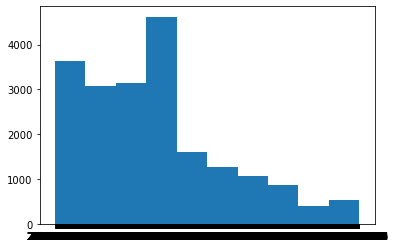

In [17]:
apple_data = news[news['ticker'] == 'AAPL']
plt.hist(apple_data['release_date'])
plt.xticks()

max(apple_data['release_date'])[8:10]
date_max = datetime.date(int(max(apple_data['release_date'])[0:4]),int(max(apple_data['release_date'])[5:7]),int(max(apple_data['release_date'])[8:10]))
date_min = datetime.date(int(min(apple_data['release_date'])[0:4]),int(min(apple_data['release_date'])[5:7]),int(min(apple_data['release_date'])[8:10]))

In [18]:
top_20_ranked_stocks_by_article_count = tick_mc_an.loc[:,"Symbol"].head(20)
top_20_ranked_stocks_by_article_count

0     AAPL
1     MSFT
16     BAC
2     AMZN
3     TSLA
6      XOM
9      JPM
19      KO
8      WMT
11     CVX
5      JNJ
15      HD
13      PG
18     MRK
17     PFE
12     LLY
10    NVDA
14      MA
4      UNH
7        V
Name: Symbol, dtype: object

In [19]:
top_20_ranked_stocks_by_article_count = top_20_ranked_stocks_by_article_count.astype(str).values.tolist()

In [20]:
top_20_ranked_stocks_by_article_count

['AAPL',
 'MSFT',
 'BAC',
 'AMZN',
 'TSLA',
 'XOM',
 'JPM',
 'KO',
 'WMT',
 'CVX',
 'JNJ',
 'HD',
 'PG',
 'MRK',
 'PFE',
 'LLY',
 'NVDA',
 'MA',
 'UNH',
 'V']

In [21]:
msft = yf.Ticker("MSFT")

In [22]:
hist = msft.history(period="5d")

In [23]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-28 00:00:00-05:00,246.080002,246.649994,240.800003,241.759995,24778200,0,0
2022-11-29 00:00:00-05:00,241.399994,242.789993,238.210007,240.330002,17956300,0,0
2022-11-30 00:00:00-05:00,240.570007,255.330002,239.860001,255.139999,47594200,0,0
2022-12-01 00:00:00-05:00,253.869995,256.119995,250.919998,254.690002,26024100,0,0
2022-12-02 00:00:00-05:00,249.820007,253.800003,249.750000,252.940002,8573303,0,0


In [24]:
# downloaded_stock_data = yf.download(top_10_ranked_stocks_by_marketcap_str, start="2011-01-01", end="2019-12-31", group_by="ticker")

In [25]:
dataframe_stock_data = pd.read_csv(r'C:\Users\Nitai Nijholt\OneDrive\Documents\GitHub\Project_SDA\Data\stock_data.csv')

In [26]:
dataframe_stock_data.columns

Index(['Unnamed: 0', 'CVX', 'CVX.1', 'CVX.2', 'CVX.3', 'CVX.4', 'CVX.5',
       'NVDA', 'NVDA.1', 'NVDA.2',
       ...
       'AMZN.2', 'AMZN.3', 'AMZN.4', 'AMZN.5', 'V', 'V.1', 'V.2', 'V.3', 'V.4',
       'V.5'],
      dtype='object', length=121)

In [27]:
# we only need the .4 as this is the column that holds the adjusted close, so making this loop to mask the dataframe

for i in range(len(top_20_ranked_stocks_by_article_count)):
    top_20_ranked_stocks_by_article_count[i] = top_20_ranked_stocks_by_article_count[i] +'.4'
top_20_ranked_stocks_by_article_count

['AAPL.4',
 'MSFT.4',
 'BAC.4',
 'AMZN.4',
 'TSLA.4',
 'XOM.4',
 'JPM.4',
 'KO.4',
 'WMT.4',
 'CVX.4',
 'JNJ.4',
 'HD.4',
 'PG.4',
 'MRK.4',
 'PFE.4',
 'LLY.4',
 'NVDA.4',
 'MA.4',
 'UNH.4',
 'V.4']

In [28]:

column_indexer_adjusted_close_only = top_20_ranked_stocks_by_article_count

In [29]:
dataframe_stock_data["Date"] = dataframe_stock_data["Unnamed: 0"]
dataframe_stock_data.columns

Index(['Unnamed: 0', 'CVX', 'CVX.1', 'CVX.2', 'CVX.3', 'CVX.4', 'CVX.5',
       'NVDA', 'NVDA.1', 'NVDA.2',
       ...
       'AMZN.3', 'AMZN.4', 'AMZN.5', 'V', 'V.1', 'V.2', 'V.3', 'V.4', 'V.5',
       'Date'],
      dtype='object', length=122)

In [30]:
#dropping first two rows

dataframe_stock_data_selected_stocks = dataframe_stock_data[column_indexer_adjusted_close_only].loc[2:,:]
#renaming date column to be a date

dataframe_stock_data_selected_stocks

,AAPL.4,MSFT.4,BAC.4,AMZN.4,TSLA.4,XOM.4,JPM.4,KO.4,WMT.4,CVX.4,JNJ.4,HD.4,PG.4,MRK.4,PFE.4,LLY.4,NVDA.4,MA.4,UNH.4,V.4
2,10.0332612991333,21.856332778930664,12.012041091918945,9.211000442504883,1.7746670246124268,46.50217056274414,31.384624481201172,22.505250930786133,41.66514587402344,57.01817321777344,44.52234649658203,26.823223114013672,45.26420974731445,23.10027313232422,10.830879211425781,24.827224731445312,3.6297099590301514,20.722257614135742,31.065296173095703,16.184938430786133
3,10.085627555847168,21.9422550201416,12.054369926452637,9.250499725341797,1.777999997138977,46.720497131347656,31.838842391967773,22.039405822753906,41.82551574707031,56.80732345581055,44.897972106933594,26.337039947509766,45.39000701904297,23.298973083496094,11.020782470703125,24.848499298095703,3.6182384490966797,20.989673614501953,31.349763870239258,16.20330047607422
4,10.16812801361084,21.8719539642334,12.274459838867188,9.371000289916992,1.7886669635772705,46.595733642578125,32.22818374633789,21.90827751159668,41.550594329833984,56.70808410644531,44.869625091552734,26.25349235534668,45.28517532348633,23.433578491210938,11.094297409057617,24.67116355895996,3.8958592414855957,21.608001708984375,31.450149536132812,16.545263290405273
5,10.159910202026367,22.512489318847656,12.223673820495605,9.293000221252441,1.858667016029358,46.8951530456543,32.06956100463867,21.749547958374023,41.206966400146484,56.24293899536133,44.79874801635742,26.14712905883789,45.20829772949219,23.75405502319336,11.137179374694824,24.784664154052734,4.435039043426514,21.70001220703125,32.10276412963867,16.793128967285156
6,10.232666969299316,22.340635299682617,12.062838554382324,9.274499893188477,1.8826669454574585,47.15089416503906,31.46392822265625,21.711589813232422,41.29860305786133,56.553035736083984,44.366432189941406,26.11674690246582,45.07553482055664,23.93994140625,11.23519515991211,24.756290435791016,4.558935642242432,21.697195053100586,32.169673919677734,16.744937896728516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,69.5571060180664,153.03126525878906,33.03183364868164,89.6500015258789,27.947999954223633,58.981143951416016,125.19734954833984,49.991432189941406,113.88716888427734,104.4437026977539,135.49964904785156,204.62692260742188,116.01876831054688,79.84685516357422,33.406890869140625,124.94463348388672,59.49899673461914,292.51873779296875,283.5381774902344,183.41290283203125
2261,69.62322235107422,153.0020751953125,33.078800201416016,89.46050262451172,28.350000381469727,58.75456237792969,125.54412841796875,49.80934143066406,114.34645080566406,104.45237731933594,135.02774047851562,205.98974609375,116.3160171508789,79.58573913574219,33.38139724731445,124.90650939941406,59.44916915893555,292.7254333496094,283.009765625,183.89334106445312
2262,71.00457000732422,154.2561798095703,33.360565185546875,93.4384994506836,28.729333877563477,58.84687042236328,126.87639617919922,50.091583251953125,114.35600280761719,104.67803955078125,134.93521118164062,206.1298065185547,116.3160171508789,79.49871826171875,33.45787048339844,124.93510437011719,59.5911750793457,294.41790771484375,284.0762939453125,185.45213317871094
2263,70.97764587402344,154.53814697265625,33.200889587402344,93.48999786376953,28.691999435424805,58.64549255371094,126.96766662597656,50.39202117919922,114.42298126220703,104.41765594482422,134.86122131347656,205.3363494873047,117.1241455078125,79.63796997070312,33.406890869140625,125.297119140625,59.01317596435547,295.9332580566406,284.3837890625,185.6776123046875


In [31]:
dataframe_stock_data = dataframe_stock_data.loc[2:,:]
dataframe_stock_data

,Unnamed: 0,CVX,CVX.1,CVX.2,CVX.3,CVX.4,CVX.5,NVDA,NVDA.1,NVDA.2,...,AMZN.3,AMZN.4,AMZN.5,V,V.1,V.2,V.3,V.4,V.5,Date
2,2011-01-03,91.66000366210938,92.37999725341797,91.30000305175781,91.94000244140625,57.01817321777344,7802300,3.880000114440918,3.992500066757202,3.875,...,9.211000442504883,9.211000442504883,106628000,17.600000381469727,17.729999542236328,17.547500610351562,17.6299991607666,16.184938430786133,25710000,2011-01-03
3,2011-01-04,92.27999877929688,92.4800033569336,91.22000122070312,91.5999984741211,56.80732345581055,8513900,3.9625000953674316,3.9800000190734863,3.8550000190734863,...,9.250499725341797,9.250499725341797,100636000,17.732500076293945,17.737499237060547,17.565000534057617,17.649999618530273,16.20330047607422,18138000,2011-01-04
4,2011-01-05,90.91999816894531,92.06999969482422,90.5,91.44000244140625,56.70808410644531,6659500,4.014999866485596,4.25,3.9749999046325684,...,9.371000289916992,9.371000289916992,68376000,17.709999084472656,18.082500457763672,17.670000076293945,18.022499084472656,16.545263290405273,38512800,2011-01-05
5,2011-01-06,91.76000213623047,91.83000183105469,90.2699966430664,90.69000244140625,56.24293899536133,6220800,4.355000019073486,4.835000038146973,4.34250020980835,...,9.293000221252441,9.293000221252441,63594000,18.1825008392334,18.387500762939453,18.127500534057617,18.292499542236328,16.793128967285156,28358800,2011-01-06
6,2011-01-07,90.9800033569336,91.30000305175781,90.2699966430664,91.19000244140625,56.553035736083984,6346300,4.777500152587891,4.982500076293945,4.670000076293945,...,9.274499893188477,9.274499893188477,104434000,18.360000610351562,18.387500762939453,18.125,18.239999771118164,16.744937896728516,28248400,2011-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2019-12-23,119.30999755859375,120.4000015258789,119.1500015258789,120.33000183105469,104.4437026977539,5875000,60.130001068115234,60.45249938964844,59.59749984741211,...,89.6500015258789,89.6500015258789,42728000,188.14999389648438,188.41000366210938,187.0,187.0800018310547,183.41290283203125,5831700,2019-12-23
2261,2019-12-24,120.43000030517578,120.77999877929688,120.08999633789062,120.33999633789062,104.45237731933594,1640100,59.54999923706055,59.82749938964844,59.20500183105469,...,89.46050262451172,89.46050262451172,17626000,187.10000610351562,188.02000427246094,186.91000366210938,187.57000732421875,183.89334106445312,2420900,2019-12-24
2262,2019-12-26,120.66999816894531,121.41999816894531,120.33999633789062,120.5999984741211,104.67803955078125,3648600,59.689998626708984,60.08000183105469,59.5,...,93.4384994506836,93.4384994506836,120108000,187.88999938964844,189.17999267578125,187.6999969482422,189.16000366210938,185.45213317871094,5237000,2019-12-26
2263,2019-12-27,120.88999938964844,121.29000091552734,120.23999786376953,120.30000305175781,104.41765594482422,4138300,59.95000076293945,60.084999084472656,58.95249938964844,...,93.48999786376953,93.48999786376953,123732000,189.74000549316406,189.88999938964844,188.47000122070312,189.38999938964844,185.6776123046875,5448600,2019-12-27


In [32]:

#casting the date column as a date
dataframe_stock_data_selected_stocks['Date'] = [dt.strptime(str(d), "%Y-%m-%d").date() for d in dataframe_stock_data["Unnamed: 0"]]


In [80]:

dataframe_stock_data_selected_stocks.columns

Index(['Date', 'AAPL.4', 'MSFT.4', 'BAC.4', 'AMZN.4', 'TSLA.4', 'XOM.4',
       'JPM.4', 'KO.4', 'WMT.4', 'CVX.4', 'JNJ.4', 'HD.4', 'PG.4', 'MRK.4',
       'PFE.4', 'LLY.4', 'NVDA.4', 'MA.4', 'UNH.4', 'V.4'],
      dtype='object')

In [35]:
#date column is at the last index of columns, so reinndexing to put it at the first

dataframe_stock_data_selected_stocks = dataframe_stock_data_selected_stocks[['Date','AAPL.4', 'MSFT.4', 'BAC.4', 'AMZN.4', 'TSLA.4', 'XOM.4', 'JPM.4',
       'KO.4', 'WMT.4', 'CVX.4', 'JNJ.4', 'HD.4', 'PG.4', 'MRK.4', 'PFE.4',
       'LLY.4', 'NVDA.4', 'MA.4', 'UNH.4', 'V.4']]

In [36]:
dataframe_stock_data_selected_stocks

,Date,AAPL.4,MSFT.4,BAC.4,AMZN.4,TSLA.4,XOM.4,JPM.4,KO.4,WMT.4,...,JNJ.4,HD.4,PG.4,MRK.4,PFE.4,LLY.4,NVDA.4,MA.4,UNH.4,V.4
2,2011-01-03,10.0332612991333,21.856332778930664,12.012041091918945,9.211000442504883,1.7746670246124268,46.50217056274414,31.384624481201172,22.505250930786133,41.66514587402344,...,44.52234649658203,26.823223114013672,45.26420974731445,23.10027313232422,10.830879211425781,24.827224731445312,3.6297099590301514,20.722257614135742,31.065296173095703,16.184938430786133
3,2011-01-04,10.085627555847168,21.9422550201416,12.054369926452637,9.250499725341797,1.777999997138977,46.720497131347656,31.838842391967773,22.039405822753906,41.82551574707031,...,44.897972106933594,26.337039947509766,45.39000701904297,23.298973083496094,11.020782470703125,24.848499298095703,3.6182384490966797,20.989673614501953,31.349763870239258,16.20330047607422
4,2011-01-05,10.16812801361084,21.8719539642334,12.274459838867188,9.371000289916992,1.7886669635772705,46.595733642578125,32.22818374633789,21.90827751159668,41.550594329833984,...,44.869625091552734,26.25349235534668,45.28517532348633,23.433578491210938,11.094297409057617,24.67116355895996,3.8958592414855957,21.608001708984375,31.450149536132812,16.545263290405273
5,2011-01-06,10.159910202026367,22.512489318847656,12.223673820495605,9.293000221252441,1.858667016029358,46.8951530456543,32.06956100463867,21.749547958374023,41.206966400146484,...,44.79874801635742,26.14712905883789,45.20829772949219,23.75405502319336,11.137179374694824,24.784664154052734,4.435039043426514,21.70001220703125,32.10276412963867,16.793128967285156
6,2011-01-07,10.232666969299316,22.340635299682617,12.062838554382324,9.274499893188477,1.8826669454574585,47.15089416503906,31.46392822265625,21.711589813232422,41.29860305786133,...,44.366432189941406,26.11674690246582,45.07553482055664,23.93994140625,11.23519515991211,24.756290435791016,4.558935642242432,21.697195053100586,32.169673919677734,16.744937896728516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2019-12-23,69.5571060180664,153.03126525878906,33.03183364868164,89.6500015258789,27.947999954223633,58.981143951416016,125.19734954833984,49.991432189941406,113.88716888427734,...,135.49964904785156,204.62692260742188,116.01876831054688,79.84685516357422,33.406890869140625,124.94463348388672,59.49899673461914,292.51873779296875,283.5381774902344,183.41290283203125
2261,2019-12-24,69.62322235107422,153.0020751953125,33.078800201416016,89.46050262451172,28.350000381469727,58.75456237792969,125.54412841796875,49.80934143066406,114.34645080566406,...,135.02774047851562,205.98974609375,116.3160171508789,79.58573913574219,33.38139724731445,124.90650939941406,59.44916915893555,292.7254333496094,283.009765625,183.89334106445312
2262,2019-12-26,71.00457000732422,154.2561798095703,33.360565185546875,93.4384994506836,28.729333877563477,58.84687042236328,126.87639617919922,50.091583251953125,114.35600280761719,...,134.93521118164062,206.1298065185547,116.3160171508789,79.49871826171875,33.45787048339844,124.93510437011719,59.5911750793457,294.41790771484375,284.0762939453125,185.45213317871094
2263,2019-12-27,70.97764587402344,154.53814697265625,33.200889587402344,93.48999786376953,28.691999435424805,58.64549255371094,126.96766662597656,50.39202117919922,114.42298126220703,...,134.86122131347656,205.3363494873047,117.1241455078125,79.63796997070312,33.406890869140625,125.297119140625,59.01317596435547,295.9332580566406,284.3837890625,185.6776123046875


In [99]:
new_colnames_dict = {dataframe_stock_data_selected_stocks.columns[1:][i]:top_20_ranked_stocks_by_article_count[i][:-2] for i in range(len(top_20_ranked_stocks_by_article_count))}

In [100]:
new_colnames_dict

{'AAPL.4': 'AAPL',
 'MSFT.4': 'MSFT',
 'BAC.4': 'BAC',
 'AMZN.4': 'AMZN',
 'TSLA.4': 'TSLA',
 'XOM.4': 'XOM',
 'JPM.4': 'JPM',
 'KO.4': 'KO',
 'WMT.4': 'WMT',
 'CVX.4': 'CVX',
 'JNJ.4': 'JNJ',
 'HD.4': 'HD',
 'PG.4': 'PG',
 'MRK.4': 'MRK',
 'PFE.4': 'PFE',
 'LLY.4': 'LLY',
 'NVDA.4': 'NVDA',
 'MA.4': 'MA',
 'UNH.4': 'UNH',
 'V.4': 'V'}

In [109]:
dataframe_stock_data_selected_stocks = dataframe_stock_data_selected_stocks.rename(columns=new_colnames_dict)

In [110]:
dataframe_stock_data_selected_stocks

,Date,AAPL,MSFT,BAC,AMZN,TSLA,XOM,JPM,KO,WMT,...,JNJ,HD,PG,MRK,PFE,LLY,NVDA,MA,UNH,V
2,2011-01-03,10.0332612991333,21.856332778930664,12.012041091918945,9.211000442504883,1.7746670246124268,46.50217056274414,31.384624481201172,22.505250930786133,41.66514587402344,...,44.52234649658203,26.823223114013672,45.26420974731445,23.10027313232422,10.830879211425781,24.827224731445312,3.6297099590301514,20.722257614135742,31.065296173095703,16.184938430786133
3,2011-01-04,10.085627555847168,21.9422550201416,12.054369926452637,9.250499725341797,1.777999997138977,46.720497131347656,31.838842391967773,22.039405822753906,41.82551574707031,...,44.897972106933594,26.337039947509766,45.39000701904297,23.298973083496094,11.020782470703125,24.848499298095703,3.6182384490966797,20.989673614501953,31.349763870239258,16.20330047607422
4,2011-01-05,10.16812801361084,21.8719539642334,12.274459838867188,9.371000289916992,1.7886669635772705,46.595733642578125,32.22818374633789,21.90827751159668,41.550594329833984,...,44.869625091552734,26.25349235534668,45.28517532348633,23.433578491210938,11.094297409057617,24.67116355895996,3.8958592414855957,21.608001708984375,31.450149536132812,16.545263290405273
5,2011-01-06,10.159910202026367,22.512489318847656,12.223673820495605,9.293000221252441,1.858667016029358,46.8951530456543,32.06956100463867,21.749547958374023,41.206966400146484,...,44.79874801635742,26.14712905883789,45.20829772949219,23.75405502319336,11.137179374694824,24.784664154052734,4.435039043426514,21.70001220703125,32.10276412963867,16.793128967285156
6,2011-01-07,10.232666969299316,22.340635299682617,12.062838554382324,9.274499893188477,1.8826669454574585,47.15089416503906,31.46392822265625,21.711589813232422,41.29860305786133,...,44.366432189941406,26.11674690246582,45.07553482055664,23.93994140625,11.23519515991211,24.756290435791016,4.558935642242432,21.697195053100586,32.169673919677734,16.744937896728516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2019-12-23,69.5571060180664,153.03126525878906,33.03183364868164,89.6500015258789,27.947999954223633,58.981143951416016,125.19734954833984,49.991432189941406,113.88716888427734,...,135.49964904785156,204.62692260742188,116.01876831054688,79.84685516357422,33.406890869140625,124.94463348388672,59.49899673461914,292.51873779296875,283.5381774902344,183.41290283203125
2261,2019-12-24,69.62322235107422,153.0020751953125,33.078800201416016,89.46050262451172,28.350000381469727,58.75456237792969,125.54412841796875,49.80934143066406,114.34645080566406,...,135.02774047851562,205.98974609375,116.3160171508789,79.58573913574219,33.38139724731445,124.90650939941406,59.44916915893555,292.7254333496094,283.009765625,183.89334106445312
2262,2019-12-26,71.00457000732422,154.2561798095703,33.360565185546875,93.4384994506836,28.729333877563477,58.84687042236328,126.87639617919922,50.091583251953125,114.35600280761719,...,134.93521118164062,206.1298065185547,116.3160171508789,79.49871826171875,33.45787048339844,124.93510437011719,59.5911750793457,294.41790771484375,284.0762939453125,185.45213317871094
2263,2019-12-27,70.97764587402344,154.53814697265625,33.200889587402344,93.48999786376953,28.691999435424805,58.64549255371094,126.96766662597656,50.39202117919922,114.42298126220703,...,134.86122131347656,205.3363494873047,117.1241455078125,79.63796997070312,33.406890869140625,125.297119140625,59.01317596435547,295.9332580566406,284.3837890625,185.6776123046875


In [111]:
def plot_single_stock(df: pd.DataFrame, ticker:str):
    x_values = [date for date in df["Date"]]
    y_values = [float(price) for price in df[ticker]]
    plt.plot(x_values, y_values, label = ticker)
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()

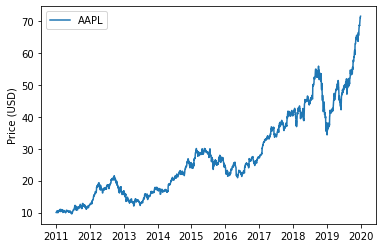

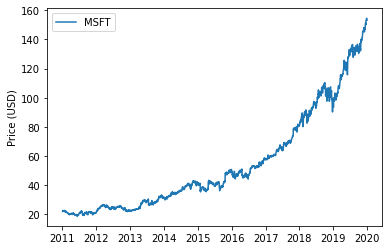

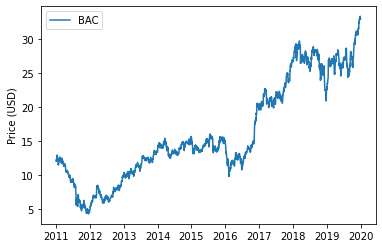

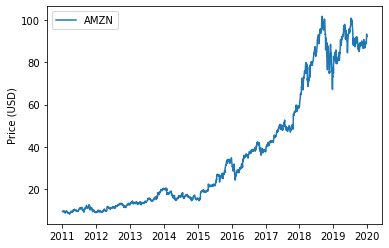

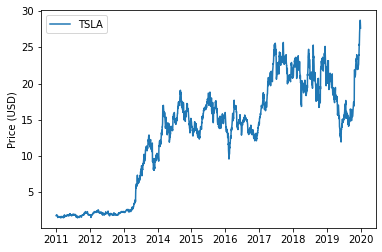

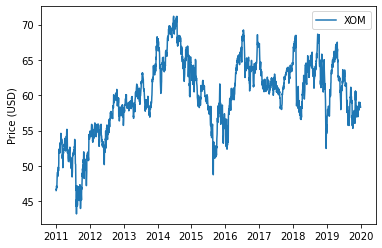

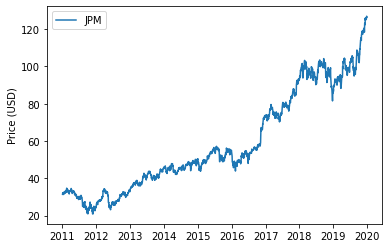

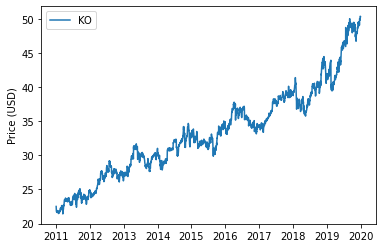

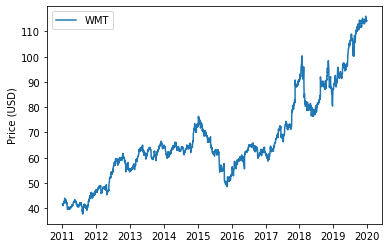

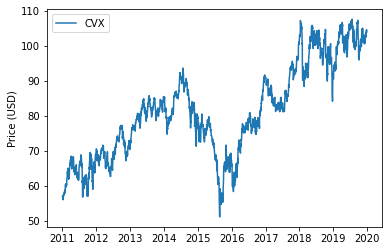

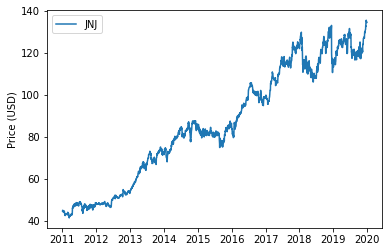

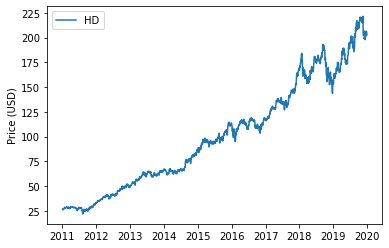

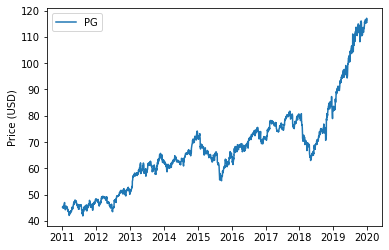

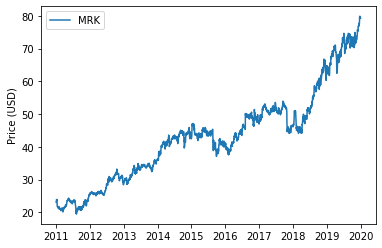

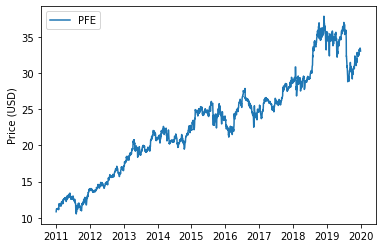

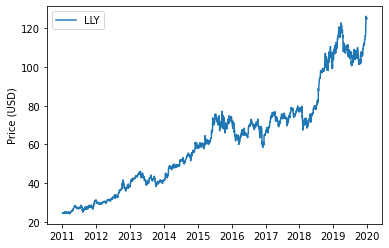

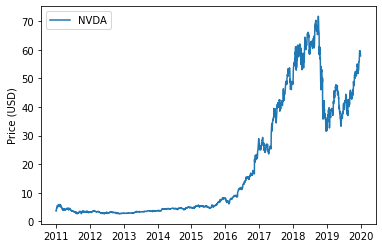

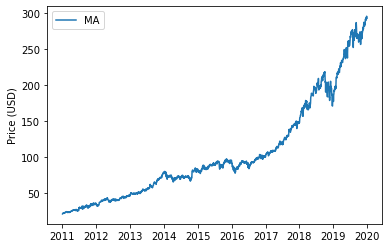

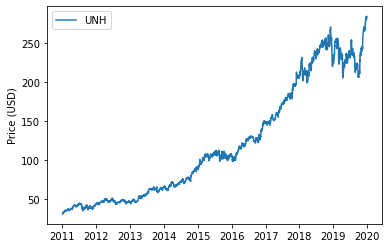

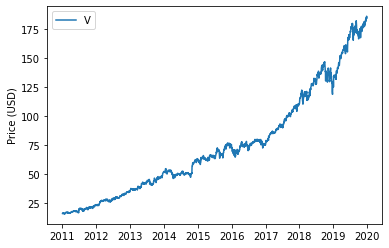

In [113]:
for stock in dataframe_stock_data_selected_stocks.columns[1:]:
    plot_single_stock(dataframe_stock_data_selected_stocks, str(stock))

In [121]:
# printing the dataframe without date column

df = dataframe_stock_data_selected_stocks.iloc[:,1:]
df

In [123]:
#checking if the timeseries are stationairy

Stationary_series =[]
Non_stationairy_series = []
#df.columns[:-1] cause we want to skip the date column
for variable in df.columns[:-1]:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(df[variable])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        print('\n')
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        print('\n')
        Non_stationairy_series.append(variable)
        
print(f'Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}')

Output results augmented Dickey Fuller test for variable: AAPL
ADF Statistic: 1.640140
p-value: 0.997973
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary


Output results augmented Dickey Fuller test for variable: MSFT
ADF Statistic: 4.091566
p-value: 1.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary


Output results augmented Dickey Fuller test for variable: BAC
ADF Statistic: 0.494716
p-value: 0.984712
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary


Output results augmented Dickey Fuller test for variable: AMZN
ADF Statistic: 0.545182
p-value: 0.986184
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion:

In [127]:
# differencing by taking percentage change in order to make the timeseries stationairy
dataframe_stock_data_selected_stocks_pct_change = pd.DataFrame([])
for stock in dataframe_stock_data_selected_stocks.columns[1:]:
    dataframe_stock_data_selected_stocks_pct_change[stock] = dataframe_stock_data_selected_stocks[stock].astype(float).pct_change()
#         print(value)

In [129]:
dataframe_stock_data_selected_stocks_pct_change['Date']= dataframe_stock_data_selected_stocks['Date']

In [130]:
dataframe_stock_data_selected_stocks_pct_change

,AAPL,MSFT,BAC,AMZN,TSLA,XOM,JPM,KO,WMT,CVX,...,HD,PG,MRK,PFE,LLY,NVDA,MA,UNH,V,Date
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-03
3,0.005219,0.003931,0.003524,0.004288,0.001878,0.004695,0.014473,-0.020699,0.003849,-0.003698,...,-0.018125,0.002779,0.008602,0.017534,0.000857,-0.003160,0.012905,0.009157,0.001135,2011-01-04
4,0.008180,-0.003204,0.018258,0.013026,0.005999,-0.002670,0.012229,-0.005950,-0.006573,-0.001747,...,-0.003172,-0.002310,0.005777,0.006671,-0.007137,0.076728,0.029459,0.003202,0.021105,2011-01-05
5,-0.000808,0.029286,-0.004138,-0.008324,0.039135,0.006426,-0.004922,-0.007245,-0.008270,-0.008202,...,-0.004051,-0.001698,0.013676,0.003865,0.004601,0.138398,0.004258,0.020751,0.014981,2011-01-06
6,0.007161,-0.007634,-0.013158,-0.001991,0.012912,0.005453,-0.018885,-0.001745,0.002224,0.005514,...,-0.001162,-0.002937,0.007825,0.008801,-0.001145,0.027936,-0.000130,0.002084,-0.002870,2011-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,0.016319,0.000000,0.006007,0.003638,0.033605,0.005004,-0.000292,-0.001092,-0.010475,0.005431,...,-0.008952,-0.003670,0.001747,0.002294,-0.009665,-0.002298,-0.004354,0.008544,-0.004894,2019-12-23
2261,0.000951,-0.000191,0.001422,-0.002114,0.014384,-0.003842,0.002770,-0.003642,0.004033,0.000083,...,0.006660,0.002562,-0.003270,-0.000763,-0.000305,-0.000837,0.000707,-0.001864,0.002619,2019-12-24
2262,0.019840,0.008197,0.008518,0.044467,0.013380,0.001571,0.010612,0.005666,0.000084,0.002160,...,0.000680,0.000000,-0.001093,0.002291,0.000229,0.002389,0.005782,0.003769,0.008477,2019-12-26
2263,-0.000379,0.001828,-0.004786,0.000551,-0.001300,-0.003422,0.000719,0.005998,0.000586,-0.002487,...,-0.003849,0.006948,0.001752,-0.001524,0.002898,-0.009699,0.005147,0.001082,0.001216,2019-12-27


looking for missing values

In [133]:

for variable in dataframe_stock_data_selected_stocks_pct_change.columns:
    print(dataframe_stock_data_selected_stocks_pct_change[variable].isnull().sum())

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0


Looks like values are missing from the price columns. this is as expected, because by taking differences we are losing the value of the first timestep

In [134]:
#skipping the nans in the frist row (as the values there were lost during taking pct change.)
dataframe_stock_data_selected_stocks_pct_change =dataframe_stock_data_selected_stocks_pct_change[1:]

In [148]:
#skipping date column
dataframe_stock_data_selected_stocks_pct_change.iloc[:,:-1]

,AAPL,MSFT,BAC,AMZN,TSLA,XOM,JPM,KO,WMT,CVX,JNJ,HD,PG,MRK,PFE,LLY,NVDA,MA,UNH,V
3,0.005219,0.003931,0.003524,0.004288,0.001878,0.004695,0.014473,-0.020699,0.003849,-0.003698,0.008437,-0.018125,0.002779,0.008602,0.017534,0.000857,-0.003160,0.012905,0.009157,0.001135
4,0.008180,-0.003204,0.018258,0.013026,0.005999,-0.002670,0.012229,-0.005950,-0.006573,-0.001747,-0.000631,-0.003172,-0.002310,0.005777,0.006671,-0.007137,0.076728,0.029459,0.003202,0.021105
5,-0.000808,0.029286,-0.004138,-0.008324,0.039135,0.006426,-0.004922,-0.007245,-0.008270,-0.008202,-0.001580,-0.004051,-0.001698,0.013676,0.003865,0.004601,0.138398,0.004258,0.020751,0.014981
6,0.007161,-0.007634,-0.013158,-0.001991,0.012912,0.005453,-0.018885,-0.001745,0.002224,0.005514,-0.009650,-0.001162,-0.002937,0.007825,0.008801,-0.001145,0.027936,-0.000130,0.002084,-0.002870
7,0.018833,-0.013287,0.010526,-0.004367,0.007436,-0.006086,-0.005500,0.002225,-0.006472,-0.008554,-0.007029,0.000291,-0.002171,-0.004016,-0.004362,-0.011748,0.038248,-0.003851,0.000000,-0.015762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,0.016319,0.000000,0.006007,0.003638,0.033605,0.005004,-0.000292,-0.001092,-0.010475,0.005431,0.002602,-0.008952,-0.003670,0.001747,0.002294,-0.009665,-0.002298,-0.004354,0.008544,-0.004894
2261,0.000951,-0.000191,0.001422,-0.002114,0.014384,-0.003842,0.002770,-0.003642,0.004033,0.000083,-0.003483,0.006660,0.002562,-0.003270,-0.000763,-0.000305,-0.000837,0.000707,-0.001864,0.002619
2262,0.019840,0.008197,0.008518,0.044467,0.013380,0.001571,0.010612,0.005666,0.000084,0.002160,-0.000685,0.000680,0.000000,-0.001093,0.002291,0.000229,0.002389,0.005782,0.003769,0.008477
2263,-0.000379,0.001828,-0.004786,0.000551,-0.001300,-0.003422,0.000719,0.005998,0.000586,-0.002487,-0.000548,-0.003849,0.006948,0.001752,-0.001524,0.002898,-0.009699,0.005147,0.001082,0.001216


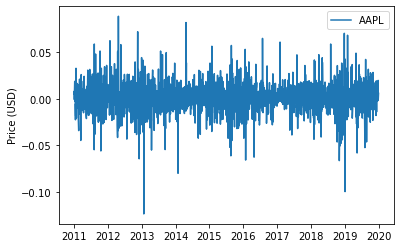

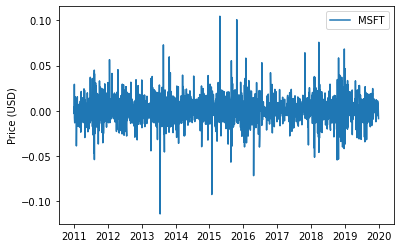

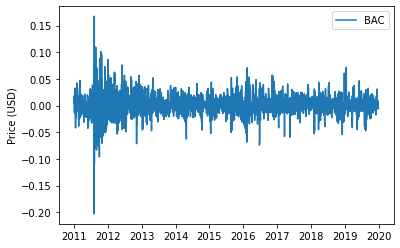

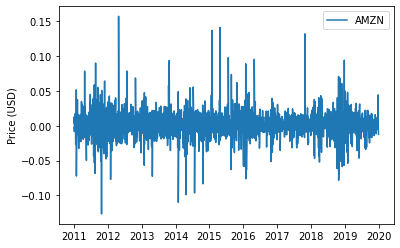

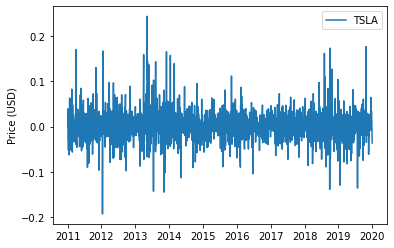

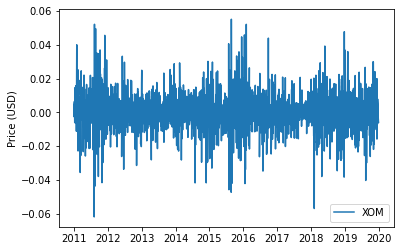

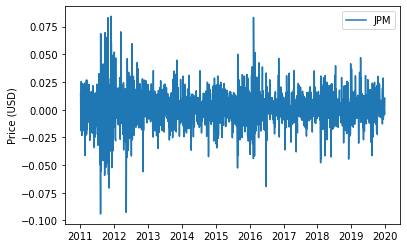

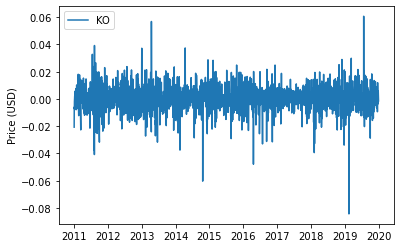

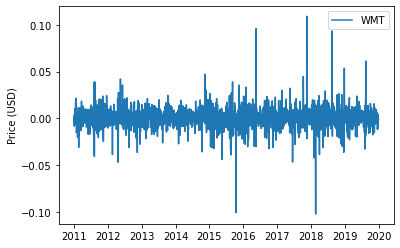

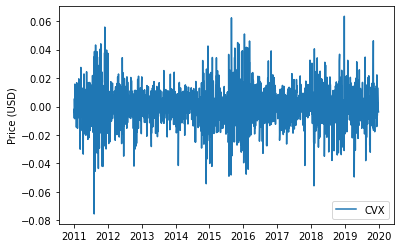

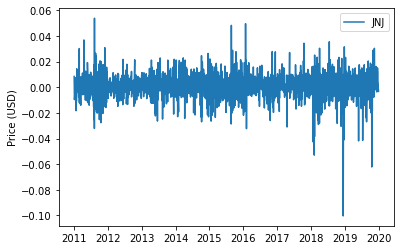

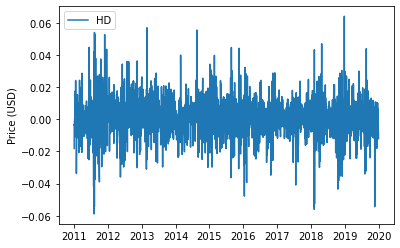

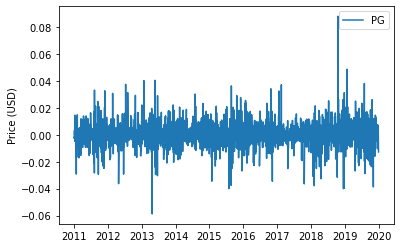

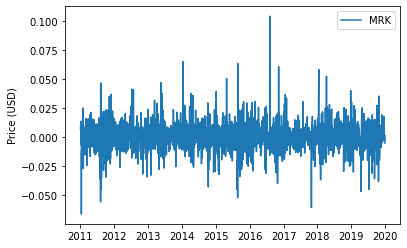

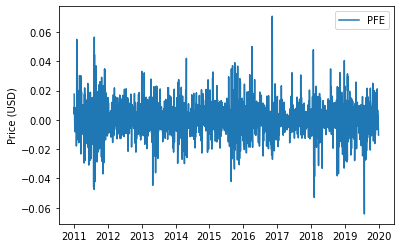

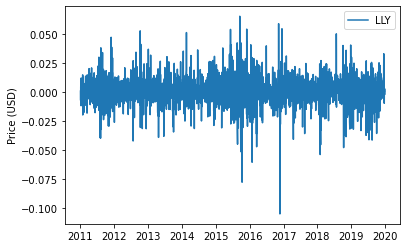

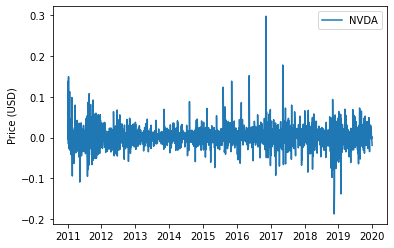

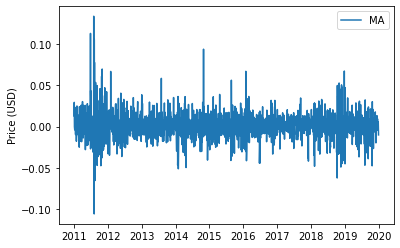

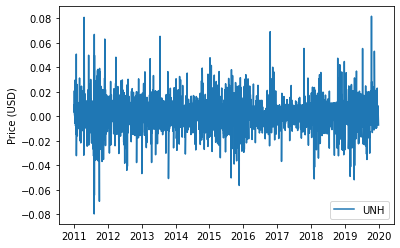

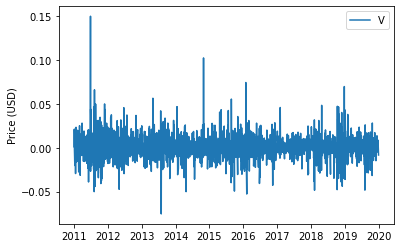

In [149]:
for stock in dataframe_stock_data_selected_stocks_pct_change.iloc[:,:-1]:
    plot_single_stock(dataframe_stock_data_selected_stocks_pct_change, str(stock))

Checking for stationarity. Mean looks constant over time, variance does not. Testing for stationarity statistically using the ADF test.

In [151]:
df = dataframe_stock_data_selected_stocks_pct_change

In [152]:
df = dataframe_stock_data_selected_stocks_pct_change.iloc[:,:-2]

In [153]:
#checking if the timeseries are stationairy

Stationary_series =[]
Non_stationairy_series = []
#df.columns[:-1] cause we want to skip the date column
for variable in df.columns[:-1]:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(df[variable])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        print('\n')
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        print('\n')
        Non_stationairy_series.append(variable)
        
print(f'Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}')

Output results augmented Dickey Fuller test for variable: AAPL
ADF Statistic: -14.808812
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: MSFT
ADF Statistic: -18.696631
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: BAC
ADF Statistic: -12.724699
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: AMZN
ADF Statistic: -34.969185
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclu

In [154]:
#printing skewness per variable

Skewed_variables = []
Kurtosis_containing_variables = []

for i in df.columns[:-1]:
    print(df[i].describe())
    print(f'Kurtosis: {df[i].kurtosis()}')
    print(f'Skewness: {df[i].skew()}')
    print('\n')
    if df[i].kurtosis() <= -10 or df[i].kurtosis() >= 10:
        Kurtosis_containing_variables.append(i)
    else: 
        continue
    if df[i].skew() >= 3 or df[i].skew() <= -3:
        Skewed_variables.append(i)


if len (Skewed_variables) == 0:
        print(f'All variables have skewness in acceptable ranges (-3 < skewness < 3)\n')
if len (Kurtosis_containing_variables) == 0:
        print(f'All variables have kurtosis in acceptable ranges (-10 < kurtosis < 10)\n')
        print('\n')
elif len (Kurtosis_containing_variables) != 0:
        print(f'Not all variables have kurtosis in acceptable ranges (-10 < kurtosis < 10). The variables which have kurtosis outside this range are: {Kurtosis_containing_variables}\n')
        print('\n')

count    2262.000000
mean        0.000999
std         0.016149
min        -0.123558
25%        -0.006868
50%         0.000887
75%         0.009683
max         0.088742
Name: AAPL, dtype: float64
Kurtosis: 4.713242422683797
Skewness: -0.2286657478994424


count    2262.000000
mean        0.000964
std         0.014369
min        -0.113996
25%        -0.006394
50%         0.000586
75%         0.008221
max         0.104523
Name: MSFT, dtype: float64
Kurtosis: 6.750712021762187
Skewness: 0.07487440766218907


count    2262.000000
mean        0.000650
std         0.020137
min        -0.203182
25%        -0.008724
50%         0.000423
75%         0.010365
max         0.167435
Name: BAC, dtype: float64
Kurtosis: 9.604514010556299
Skewness: -0.11935540758312584


count    2262.000000
mean        0.001207
std         0.019397
min        -0.126568
25%        -0.008078
50%         0.000980
75%         0.011139
max         0.157457
Name: AMZN, dtype: float64
Kurtosis: 8.89733652182917
Skewness: 0.4

AAPL


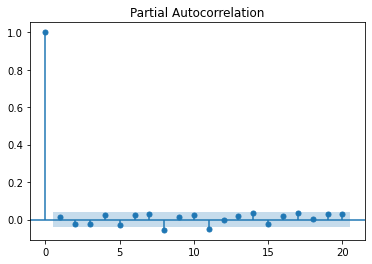

MSFT


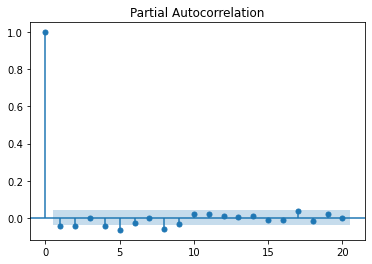

BAC


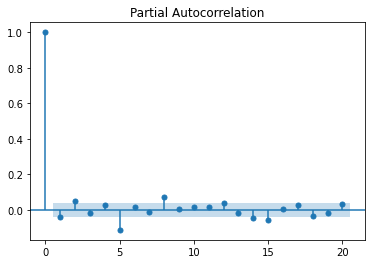

AMZN


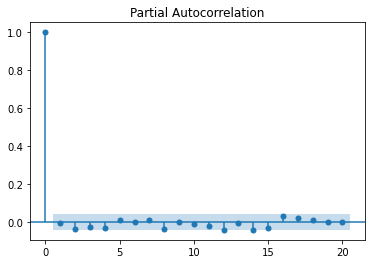

TSLA


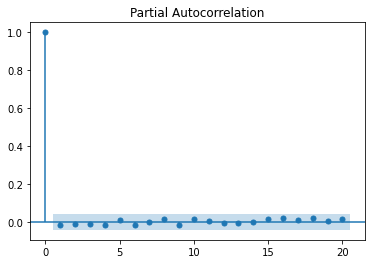

XOM


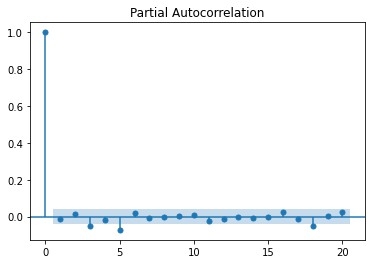

JPM


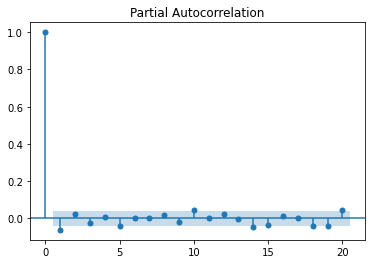

KO


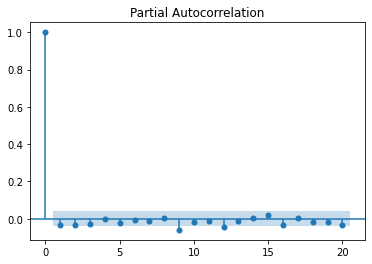

WMT


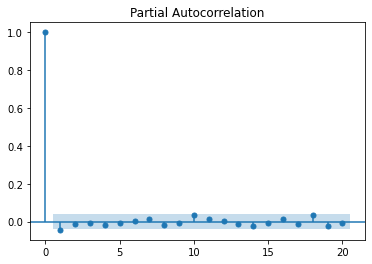

CVX


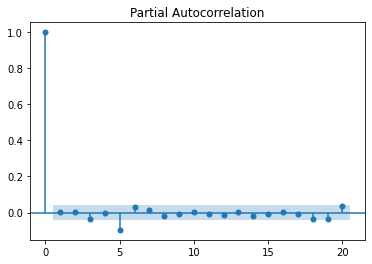

JNJ


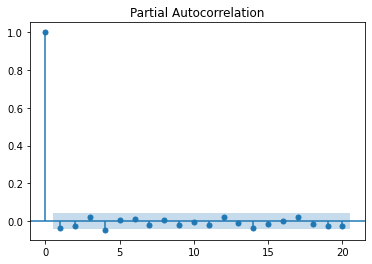

HD


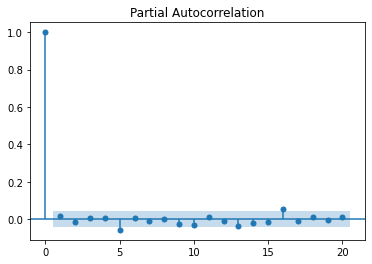

PG


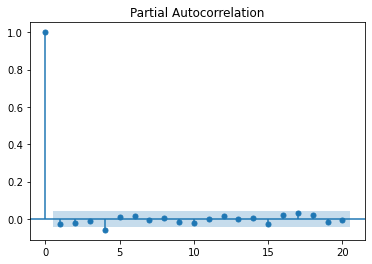

MRK


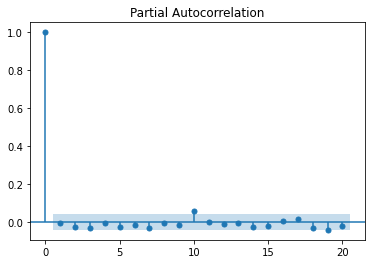

PFE


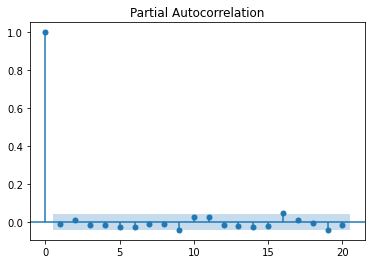

LLY


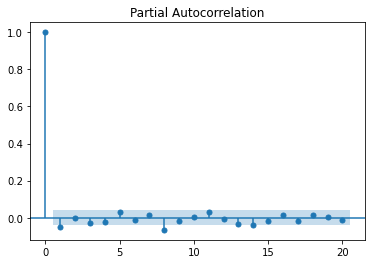

NVDA


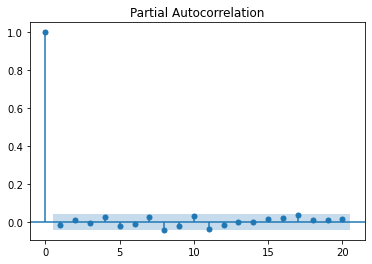

MA


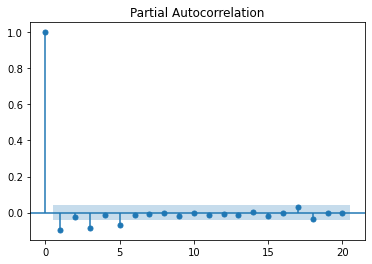

In [155]:
#testing partial auto correlations
for variable in df.columns[:-1]:
    plot_pacf(df[variable], lags = 20)
    print(variable)
    plt.show()

AAPL


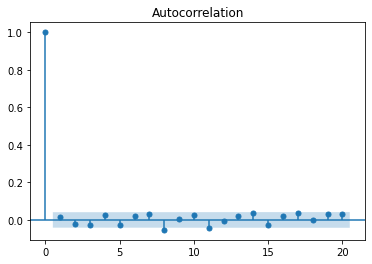

MSFT


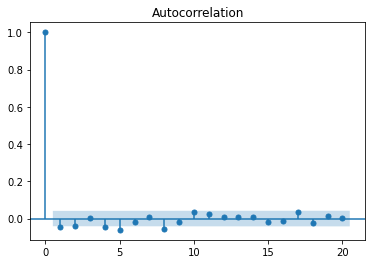

BAC


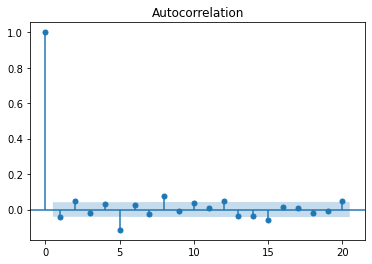

AMZN


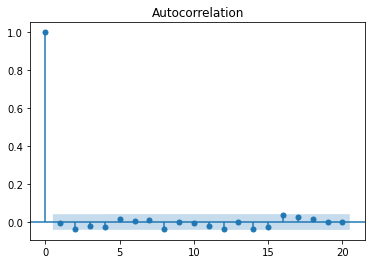

TSLA


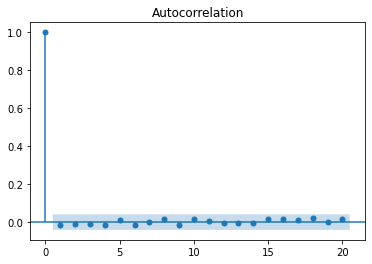

XOM


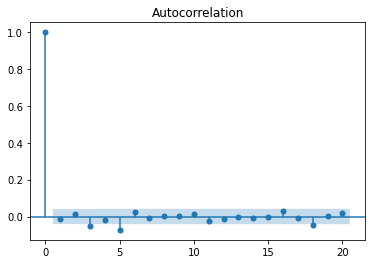

JPM


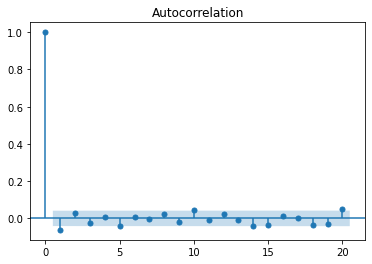

KO


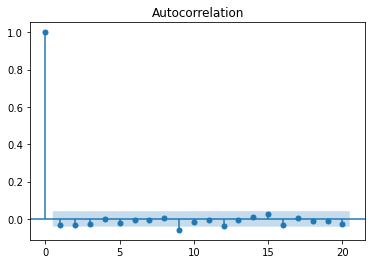

WMT


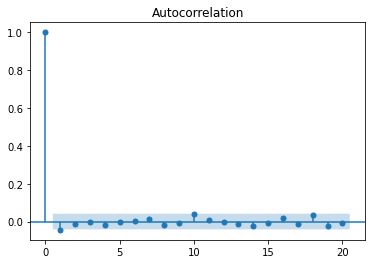

CVX


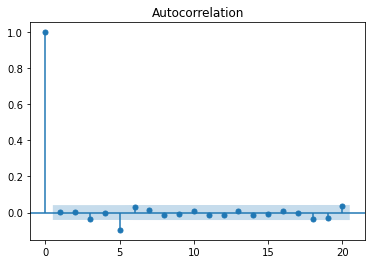

JNJ


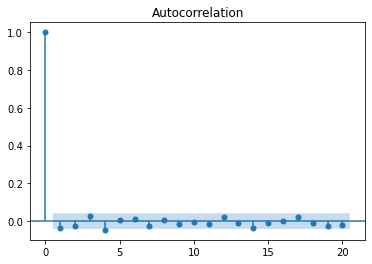

HD


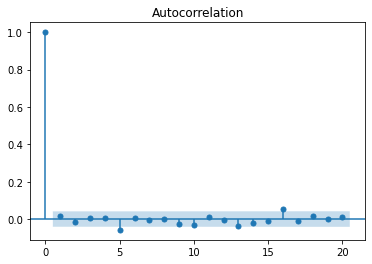

PG


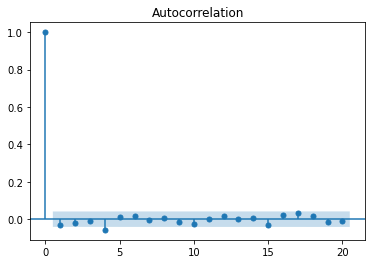

MRK


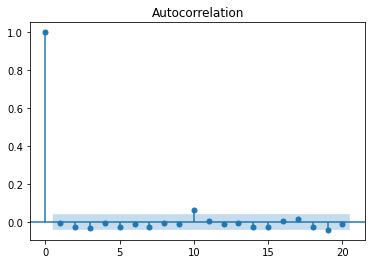

PFE


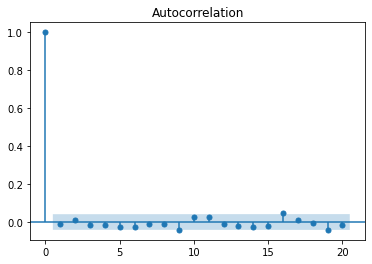

LLY


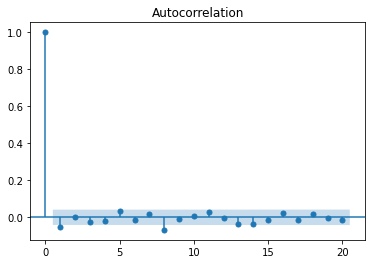

NVDA


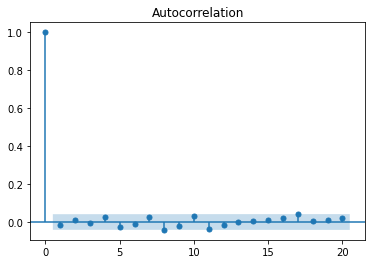

MA


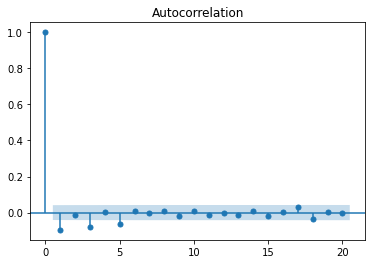

In [156]:
for variable in df.columns[:-1]:
    plot_acf(df[variable], lags = 20)
    print(variable)
    plt.show()

## The code below is copied from my thesis, most of it will probably be usefull. will sort out later which parts we need and which we dont as the anaylisis proceeds

In [ ]:
modelVAR.select_order(maxlags = 3).summary()

In [ ]:
results = modelVAR.fit(3)
results.summary()

In [ ]:
#results indicate significant residual auto correlation

results.test_whiteness().summary()

In [ ]:
#Normality looks okay

results.test_normality().summary()

In [ ]:
corr = df.corr()
corr
# corr.style.background_gradient(cmap='coolwarm')

In [ ]:
#testing for ARCH effects

residuals = resultsVECM_oldagedependecyratio_exogcoint.resid
print("Engle’s Test for Autoregressive Conditional Heteroscedasticity (ARCH)\n")
for i in range(len(residuals[0,:])):
    het_test_result= het_arch(residuals[:,i],nlags=2)
    print(f'the Lagrange multiplier test of variable: {endog.columns[i]} has test statistic: {het_test_result[0]} and has p-value: {het_test_result[1]}')
    if het_test_result[1] <=0.05:
        print('found p-value < 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is rejected\n')
    else:
        print('found p-value > 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is not rejected\n')

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residuals)

In [ ]:

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=2
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


df_1 = grangers_causation_matrix(df, variables = df.columns)  
df_1
